<a href="https://colab.research.google.com/github/jonathannocek/twitter-analysis/blob/master/twitter-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Analysis**

Author: Jonathan Nocek

## **Overview**

This notebook will analyze data collected from the my Twitter Search function which can be found [here](https://github.com/jonathannocek/twitter-analysis/blob/master/twitter-search.py). This function is apart of a greater project created for my senior seminar at Illinois Wesleyan University. 

## **Dataframe**

The dataframe contains 4593 tweets containing 'Elon Musk' ranging from 2/22/2020 to 2/27/2020

## **Columns**

**text** - the tweet itself

**username** - the username for who tweeted text

**datetime** - The date and time when the tweet was tweeted

**followers** - The number of followers for the user who tweeted

**sentiment** - Determines whether a tweet is positive of negative using Natural Language Processing. The specific method is Naive Bayes from TextBlob and it was trained using an example text file. 

**favorites** - The number of favorites on the tweet

**retweets** - The number of retweets on the tweet


## **Imports**

In [1]:
import json
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Initialize list and open twitter data from Drive
my_list = []
with open('drive/My Drive/twitter_data.json') as json_file:
    data = json.load(json_file)
    # Get the data from each column
    for column in data:
        text = column['text']
        username = column['username']
        datetime = column['datetime']
        followers = column['followers']
        sentiment = column['sentiment']
        favorites = column['favorites']
        retweets = column['retweets']

        # Append the data to the list
        my_list.append({'text': str(text),
                        'username': str(username),
                        'datetime': str(datetime),
                        'followers': int(followers),
                        'sentiment': str(sentiment),
                        'favorites': int(favorites),
                        'retweets': int(retweets)
                            })
    # Turn list into pandas dataframe
    raw_df = pd.DataFrame(my_list, columns = 
                              ['text','username', 'datetime', 'sentiment',
                            'followers', 'favorites','retweets'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Descriptives**

In [2]:
raw_df.head()

,text,username,datetime,sentiment,followers,favorites,retweets
0,Elon Musk asks all job candidates this one que...,thehrfieldguide,2020-02-27T14:30:03,neg,1995,0,0
1,Elon Musk asks all job candidates this one que...,ChandaChacon,2020-02-27T14:27:33,pos,2052,0,0
2,"Important: the new moon is the size of a car, ...",paracatgames,2020-02-27T14:27:11,neg,863,0,0
3,"Elon Musk still OK to claim to sell ""Full Self...",PhenomenalPoto,2020-02-27T14:27:09,neg,1148,5,0
4,Envelope-pushing visionary Elon Musk spills th...,ElonAnnounces,2020-02-27T14:23:25,pos,107,0,0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 7 columns):
text         4593 non-null object
username     4593 non-null object
datetime     4593 non-null object
sentiment    4593 non-null object
followers    4593 non-null int64
favorites    4593 non-null int64
retweets     4593 non-null int64
dtypes: int64(3), object(4)
memory usage: 251.3+ KB


In [4]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,4593.0,61029.648596,675217.304072,0.0,96.0,411.0,1918.0,21260053.0
favorites,4593.0,8.621380,96.589333,0.0,0.0,0.0,2.0,3716.0
retweets,4593.0,1.662748,23.010207,0.0,0.0,0.0,0.0,1076.0


## **Data Cleaning**

In [5]:
raw_df['datetime'] =  pd.to_datetime(raw_df['datetime'], format='%Y-%m-%dT%H:%M:%S')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 7 columns):
text         4593 non-null object
username     4593 non-null object
datetime     4593 non-null datetime64[ns]
sentiment    4593 non-null object
followers    4593 non-null int64
favorites    4593 non-null int64
retweets     4593 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 251.3+ KB


In [0]:
df = raw_df

## **Exploration**

In [7]:
df['sentiment'].value_counts()

neg    3130
pos    1463
Name: sentiment, dtype: int64

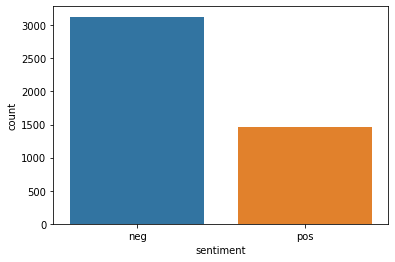

In [8]:
sns.countplot(x = 'sentiment', data = df)

**Observation** - This data seems odd. I feel like Elon Musk's public perception would be better than this. Let's check the negative tweets. I plan to try a different sentiment analysis model to compare to the Naive Bayes Mehtod from TextBlob.

In [9]:
# Create separate dataframe 
df_negative = df[df['sentiment'] == 'neg']
df_positive = df[df['sentiment'] == 'pos']
df_positive.head()

,text,username,datetime,sentiment,followers,favorites,retweets
1,Elon Musk asks all job candidates this one que...,ChandaChacon,2020-02-27 14:27:33,pos,2052,0,0
4,Envelope-pushing visionary Elon Musk spills th...,ElonAnnounces,2020-02-27 14:23:25,pos,107,0,0
9,Suggested gishwhes Item (VIDEO): Create a conv...,gishsuggest,2020-02-27 14:18:36,pos,103,0,0
14,Amazon Botched Its HQ2 Search Because Jeff Bez...,247natw,2020-02-27 14:08:09,pos,149,0,0
18,Elon Musk is a genius due to his baldness reme...,heroicalx,2020-02-27 14:00:44,pos,2,0,0


In [10]:
# Make so text is not truncated
pd.set_option('display.max_colwidth', -1)
df_positive['text'].head()

1     Elon Musk asks all job candidates this one question https://t.co/fm5PQpQXPs https://t.co/Dks4k0lTQo                                                                                                                                                                                   
4     Envelope-pushing visionary Elon Musk spills the beans on something exciting: 4D drones                                                                                                                                                                                                
9     Suggested gishwhes Item (VIDEO): Create a convincing tribute to Elon Musk using a pair of shoes. 24 POINTS                                                                                                                                                                            
14    Amazon Botched Its HQ2 Search Because Jeff Bezos Was Jealous of Elon Musk. It’s a Lesson for Every Leader Amazon's https://t.co/DAAC0NM0yM 

In [11]:
df_negative['text'].head()

0    Elon Musk asks all job candidates this one question https://t.co/dt4iUuvPv1 via @FastCoLead https://t.co/JepKLElPdT                                  
2    Important: the new moon is the size of a car, but is not in fact the literal car that Elon Musk left orbiting our planet                             
3    Elon Musk still OK to claim to sell "Full Self Driving" for the last 4 years\n\nGood job Jay Clayton! You got them this time! https://t.co/BfAxgPJ7Ph
5    why did i think that was elon musk at first https://t.co/DTE7ofObwf                                                                                  
6    Elon went "CRAZYCROUS" mode Grimes And Elon Musk Will Raise Baby As ‘They’ Until They Decide Their Gender Identity\n\nhttps://t.co/VCbrKzq7np        
Name: text, dtype: object

**Observation** - One problem with this model is that it will classify every tweet as negative or positive. Therefore, neutral tweets will be treated the same as very strong tweets. Let's try a different model

## **Exploring the Model Used**

In [0]:
# Add positive and negative sentences to list to be trained
all_data = [] # Initialize list
with open("drive/My Drive/positive.txt","r") as f:
    for line in f.read().split('\n'):
        classify = (line, 'pos')
        all_data.append(classify)
with open("drive/My Drive/negative.txt","r") as f:
    for line in f.read().split('\n'):
        classify = (line, 'neg')
        all_data.append(classify)

In [13]:
print(len(all_data))

10662


In [0]:
# Random order of data
import random
random.shuffle(all_data)

In [0]:
# Get training and testing data sets
training_data = all_data[:4000]
testing_data = all_data[4000:5000]

In [16]:
# Create Naive Bayes NLP Sentiment model
!pip install textblob
!python -m textblob.download_corpora
import textblob
from textblob.classifiers import NaiveBayesClassifier
classifier = NaiveBayesClassifier(training_data)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [19]:
accuracy = classifier.accuracy(testing_data)
print("Accuracy: ", accuracy)
classifier.show_informative_features(15)

Accuracy:  0.76
Most Informative Features
      contains(powerful) = True              pos : neg    =     14.9 : 1.0
       contains(culture) = True              pos : neg    =     12.2 : 1.0
          contains(soap) = True              neg : pos    =     11.1 : 1.0
   contains(pretentious) = True              neg : pos    =     10.4 : 1.0
    contains(engrossing) = True              pos : neg    =     10.3 : 1.0
          contains(dull) = True              neg : pos    =      9.1 : 1.0
       contains(reveals) = True              pos : neg    =      8.9 : 1.0
         contains(solid) = True              pos : neg    =      8.5 : 1.0
         contains(jokes) = True              neg : pos    =      8.4 : 1.0
         contains(plain) = True              neg : pos    =      8.4 : 1.0
          contains(warm) = True              pos : neg    =      8.3 : 1.0
         contains(worst) = True              neg : pos    =      8.3 : 1.0
      contains(touching) = True              pos : neg    

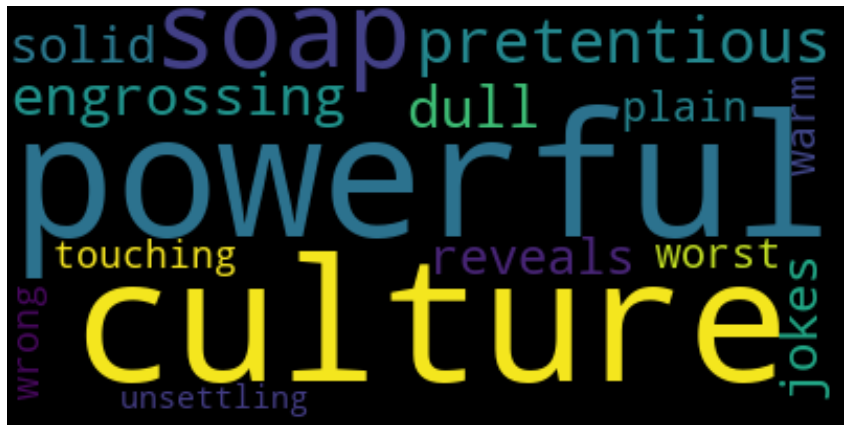

In [53]:
# Function for finding word in string below
# Found here: https://stackoverflow.com/questions/3368969/find-string-between-two-substrings
def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

# Get features
most_info_feat = classifier.informative_features(15)
words = [] # Initialize list
for text in most_info_feat:
  # Get words out of most_info_feat and add to list
  s = text[0]
  word = find_between_r(s, 'contains(', ')')
  words.append(word)

# Join words from list to make single string
text = ' '.join(words)
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

# Configure image
plt.figure(figsize = (15, 9))
plt.imshow(wordcloud, interpolation= "bilinear") # Show image
plt.axis("off")
plt.show()

In [33]:
from sklearn.metrics import f1_score
# Collecting truth values
ground_truth = [r[1] for r in testing_data]

predicted = [] # Initialize List
for r in testing_data:
  # Collected predicted values
  blob = textblob.TextBlob(r[0], classifier=classifier)
  sentiment = blob.classify()
  predicted.append(sentiment)

f1_score(ground_truth, predicted, labels=['neg', 'pos'], average='micro')

0.76

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


results = confusion_matrix(ground_truth, predicted)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(ground_truth, predicted))
print('Classification Report : ')
print (classification_report(ground_truth, predicted))

Confusion Matrix :
[[385 107]
 [133 375]]
Accuracy Score : 0.76
Classification Report : 
              precision    recall  f1-score   support

         neg       0.74      0.78      0.76       492
         pos       0.78      0.74      0.76       508

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000

